# 📌 K-Nearest Neighbors (KNN) - A Complete Guide

This notebook covers the **theory, mathematics, and practical implementation** of **K-Nearest Neighbors (KNN)**, including:
✔ **How KNN works**  
✔ **Different distance metrics**  
✔ **Curse of Dimensionality**  
✔ **Hyperparameter tuning**  

---

## 📖 1. Introduction to K-Nearest Neighbors (KNN)
**K-Nearest Neighbors (KNN)** is a **non-parametric, instance-based learning algorithm** used for both **classification and regression**.

### 🔹 Why Use KNN?
✔ **Simple & intuitive**  
✔ **Works well with small datasets**  
✔ **No training phase (lazy learning)**  

⚠ **Limitations:**
- **Slow for large datasets** (because of distance computation).
- **Sensitive to irrelevant features**.
- **Struggles in high dimensions (Curse of Dimensionality).**

---

## 🧮 2. Mathematics Behind KNN

### 🔹 1. How Does KNN Work?
1. **Choose the number of neighbors ($k$).**  
2. **Compute distances** between the test point and all training points.  
3. **Select the $k$ closest points**.  
4. **Majority vote (classification) or average (regression).**  

✅ **No explicit training phase**—KNN stores data and **makes predictions on demand**.

---

### 🔹 2. Distance Metrics in KNN
KNN relies on distance computation to find the **nearest neighbors**.  
The choice of **distance metric** affects model performance.

#### **1️⃣ Euclidean Distance (Default)**
Most commonly used, measures **straight-line distance**:

$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

✅ **Good for continuous numerical features.**  
⚠ **Sensitive to feature scaling (requires normalization).**  

#### **2️⃣ Manhattan Distance (Taxicab Distance)**
Measures **absolute differences**:

$$
d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
$$

✅ **Works well with grid-like structures (e.g., city blocks).**  

#### **3️⃣ Minkowski Distance (Generalized Form)**
A **generalization** of both Euclidean and Manhattan:

$$
d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$$

- **$p = 1$** → Manhattan Distance  
- **$p = 2$** → Euclidean Distance  

✅ **Can be tuned using `p` to adjust sensitivity.**  

---

### 🔹 3. Curse of Dimensionality
**KNN struggles in high-dimensional spaces** because:
- **Distances become less meaningful** → All points tend to be equally distant.  
- **Sparsity increases** → Harder to find "nearest" neighbors.  
- **Computational cost grows** → More features = More distance calculations.

🔍 **Solution:**  
- **Feature selection** (drop irrelevant features).  
- **Dimensionality reduction (PCA, t-SNE)**.  
- **Use distance-weighted voting** (neighbors contribute based on distance).

---


In [1]:
# 📦 Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 📂 3. Loading and Preprocessing the Dataset

We will use the **Iris dataset**, a well-known classification dataset.


In [2]:
# Load dataset (Iris)
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Target"] = data.target  # 0 = Setosa, 1 = Versicolor, 2 = Virginica

# Display first five rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 🔍 4. Data Preprocessing

Before training:
✔ **Check for missing values**  
✔ **Normalize features using StandardScaler**  
✔ **Split dataset into train & test**


In [3]:
# Check for missing values
print("🔍 Missing values per column:\n", df.isnull().sum())

# Separate features and target
X = df.drop(columns=["Target"])
y = df["Target"]

# Normalize features (KNN is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"✅ Data prepared: Train = {X_train.shape}, Test = {X_test.shape}")


🔍 Missing values per column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64
✅ Data prepared: Train = (120, 4), Test = (30, 4)


## 🤖 5. Training a KNN Model

We will train a **KNN classifier** and evaluate its performance.


In [4]:
# Initialize and train KNN classifier (default k=5)
knn_model = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"📊 KNN Accuracy (k=5): {accuracy_knn:.4f}")


📊 KNN Accuracy (k=5): 1.0000


## 📉 6. Evaluating Performance with Different k-values

Let's analyze how **different values of $k$ affect accuracy**.


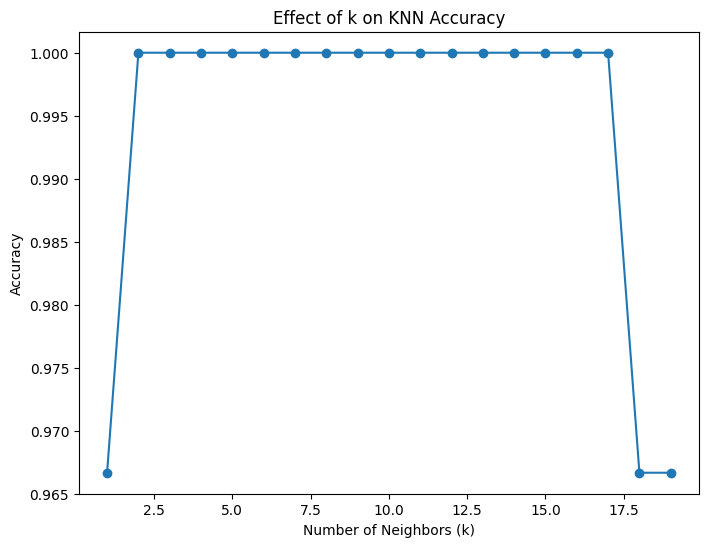

In [5]:
# Try different values of k
k_values = range(1, 20)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs. k
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker="o", linestyle="-")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Effect of k on KNN Accuracy")
plt.show()


## 🎯 7. Hyperparameter Tuning with GridSearchCV

We will tune:
✔ **n_neighbors** (k-value)  
✔ **metric** (distance calculation)


In [6]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_neighbors': range(1, 20),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"✅ Best parameters: {grid_search.best_params_}")

# Evaluate best model
best_knn = grid_search.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

# Compute accuracy
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print(f"📊 Best KNN Accuracy: {accuracy_best_knn:.4f}")


✅ Best parameters: {'metric': 'euclidean', 'n_neighbors': 9}
📊 Best KNN Accuracy: 1.0000


## 💡 8. Interview Questions

1️⃣ **What is the objective of KNN?**  
   - Predict the class of a new point by looking at **the majority vote** among its $k$ nearest neighbors.

2️⃣ **How do you choose the best value of $k$?**  
   - Use **Grid Search** or **elbow method** (plot accuracy vs. k).

3️⃣ **What is the effect of high vs. low $k$?**  
   - **Low $k$ (e.g., 1-3)** → More variance (overfitting).  
   - **High $k$ (e.g., 10-50)** → More bias (underfitting).

4️⃣ **What is the Curse of Dimensionality in KNN?**  
   - As dimensions increase, **distances become less meaningful** and all points appear equally distant.

5️⃣ **How can we handle high-dimensional data in KNN?**  
   - Use **feature selection** or **dimensionality reduction (PCA, t-SNE)**.
